# Unsupervised Learning Exercises
* This notebook was created to try out the exercise questions from `Hands On ML with Scikit-Learn` `Unsupervised Learning` chapter. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import fetch_olivetti_faces

## Exercise 1
* The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. 
* Each image is flattened to a 1D vector of size 4,096. 
* Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. 
* Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). 
* Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. 
* Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). 
* Visualize the clusters: do you see similar faces in each cluster?

## Import Data

In [2]:
data_X,data_y = fetch_olivetti_faces(return_X_y=True)

## Explore Data

In [3]:
data_X.shape,data_y.shape

((400, 4096), (400,))

In [4]:
type(data_X), type(data_y)

(numpy.ndarray, numpy.ndarray)

In [5]:
## lets convert it into DataFrame for easy data exploration
data = pd.DataFrame(data_X, columns=[f"pixel{num}" for num in range(4096)])
print(data.shape)


(400, 4096)


In [6]:
class_data = pd.DataFrame(data_y, columns=["label"])
print(class_data.shape)

(400, 1)


In [7]:
data = pd.concat([data, class_data], axis=1)
print(data.shape)
data.head()

(400, 4097)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [8]:
data.isna().sum()

pixel0       0
pixel1       0
pixel2       0
pixel3       0
pixel4       0
            ..
pixel4092    0
pixel4093    0
pixel4094    0
pixel4095    0
label        0
Length: 4097, dtype: int64

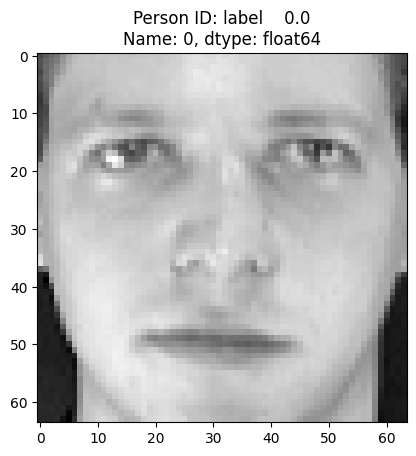

In [9]:
import matplotlib.pyplot as plt

plt.imshow(data.iloc[0,0:4096].values.reshape(64, 64), cmap='gray')
plt.title(f"Person ID: {data.loc[0,["label"]]}")
plt.show()

In [10]:
## just to understand the data let see how many unique labels we have
data["label"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

* Ok, so we have 10 labels each and no missing values. For the sake of the exercise, we'll ignore this info, but I wonder having 10 clusters make sense. 
* We know that data is already scaled. 

## Train/Test Split

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
ss.get_n_splits(data_X,data_y)

1

In [12]:
for i,(train_index, test_index) in enumerate(ss.split(data_X,data_y)):
    train_X = data_X[train_index]
    train_y = data_y[train_index]
    test_X = data_X[test_index]
    test_y = data_y[test_index]

In [13]:
## lets check label distribution in train_y and test_y
(pd.DataFrame(train_y).value_counts() / train_y.shape[0]) * 100

0 
0     2.5
1     2.5
22    2.5
23    2.5
24    2.5
25    2.5
26    2.5
27    2.5
28    2.5
29    2.5
30    2.5
31    2.5
32    2.5
33    2.5
34    2.5
35    2.5
36    2.5
37    2.5
38    2.5
21    2.5
20    2.5
19    2.5
9     2.5
2     2.5
3     2.5
4     2.5
5     2.5
6     2.5
7     2.5
8     2.5
10    2.5
18    2.5
11    2.5
12    2.5
13    2.5
14    2.5
15    2.5
16    2.5
17    2.5
39    2.5
Name: count, dtype: float64

In [14]:
(pd.DataFrame(test_y).value_counts() / test_y.shape[0]) * 100

0 
0     2.5
1     2.5
22    2.5
23    2.5
24    2.5
25    2.5
26    2.5
27    2.5
28    2.5
29    2.5
30    2.5
31    2.5
32    2.5
33    2.5
34    2.5
35    2.5
36    2.5
37    2.5
38    2.5
21    2.5
20    2.5
19    2.5
9     2.5
2     2.5
3     2.5
4     2.5
5     2.5
6     2.5
7     2.5
8     2.5
10    2.5
18    2.5
11    2.5
12    2.5
13    2.5
14    2.5
15    2.5
16    2.5
17    2.5
39    2.5
Name: count, dtype: float64

* Cool now we have perfectly stratified datasets

## Clustering Using KMeans

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=42)

start = time.time()
y_pred = kmeans.fit_predict(train_X)
end = time.time()
print(f"Training took {end - start}s")

Training took 0.10064101219177246s


In [16]:
## we got the labels for each cluster
y_pred.shape

(320,)

In [21]:
np.unique_counts(y_pred)

UniqueCountsResult(values=array([0, 1, 2, 3, 4], dtype=int32), counts=array([57, 44, 80, 63, 76]))

In [33]:
np.argwhere(y_pred == 0)

array([[  5],
       [ 17],
       [ 19],
       [ 21],
       [ 25],
       [ 28],
       [ 32],
       [ 38],
       [ 40],
       [ 44],
       [ 45],
       [ 46],
       [ 54],
       [ 60],
       [ 65],
       [ 75],
       [ 85],
       [ 86],
       [ 91],
       [ 93],
       [105],
       [119],
       [120],
       [122],
       [123],
       [126],
       [127],
       [129],
       [130],
       [140],
       [143],
       [148],
       [159],
       [172],
       [174],
       [181],
       [195],
       [196],
       [207],
       [216],
       [227],
       [228],
       [230],
       [243],
       [254],
       [261],
       [267],
       [273],
       [275],
       [279],
       [280],
       [282],
       [286],
       [291],
       [292],
       [300],
       [317]])

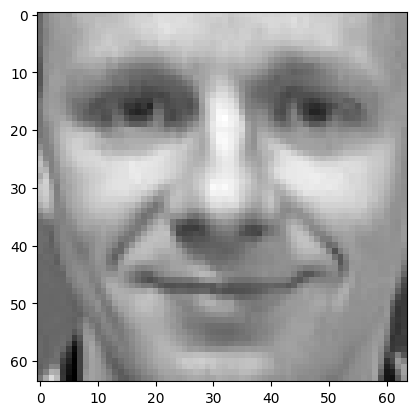

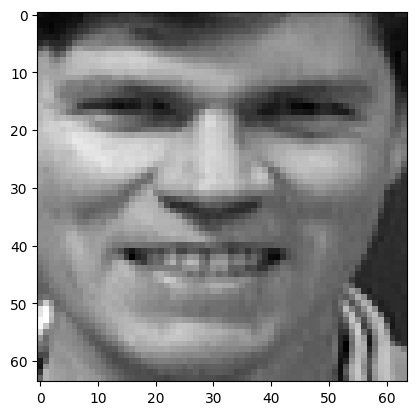

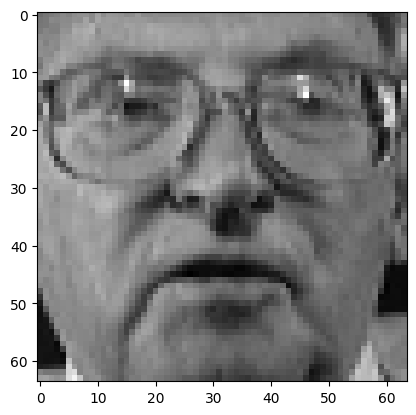

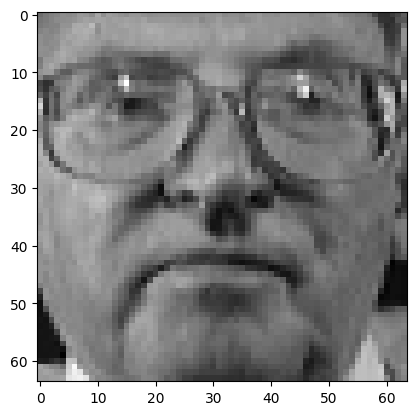

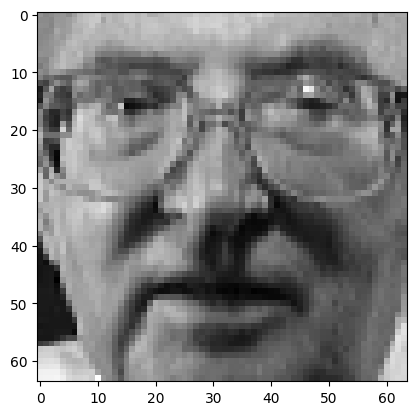

In [29]:
## lets print few images from clusters
cluster_pixels = train_X[np.argwhere(y_pred == 0)]


for image in cluster_pixels[0:5]:
    plt.imshow(image.reshape(64, 64), cmap='gray')
    # # plt.title(f"Person ID: {data.loc[0,["label"]]}")
    plt.show()    



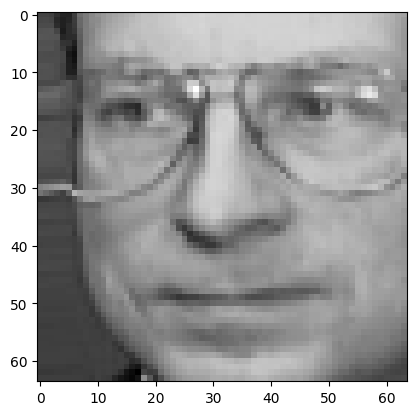

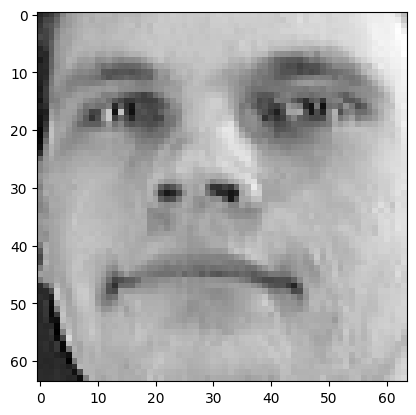

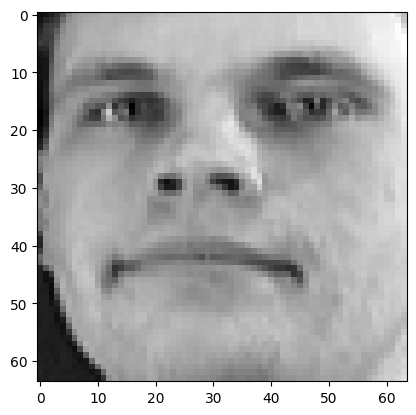

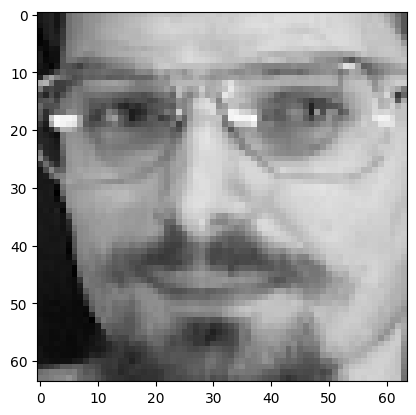

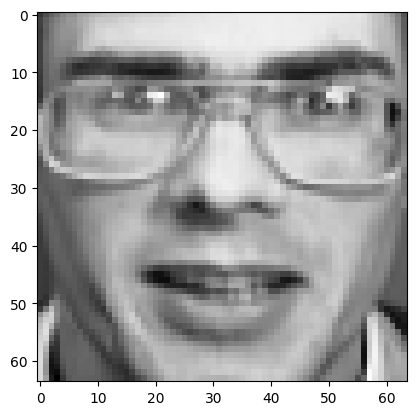

In [34]:
cluster_pixels = train_X[np.argwhere(y_pred == 1)]


for image in cluster_pixels[0:5]:
    plt.imshow(image.reshape(64, 64), cmap='gray')
    # # plt.title(f"Person ID: {data.loc[0,["label"]]}")
    plt.show()    


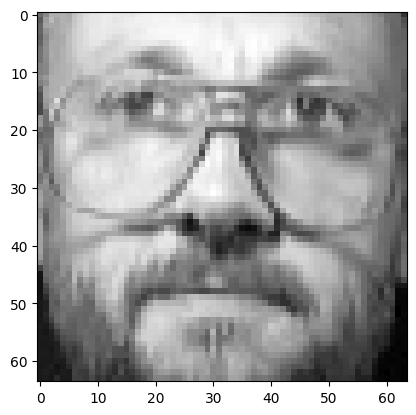

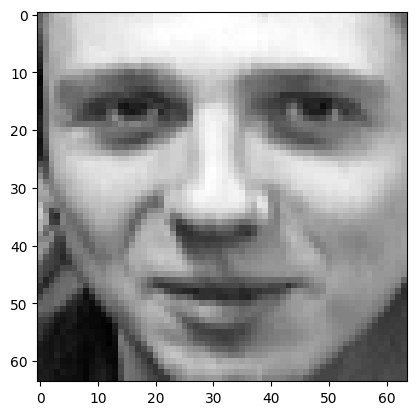

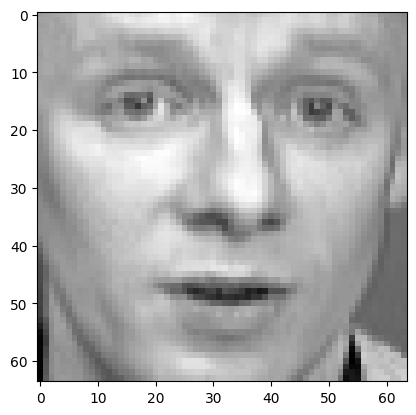

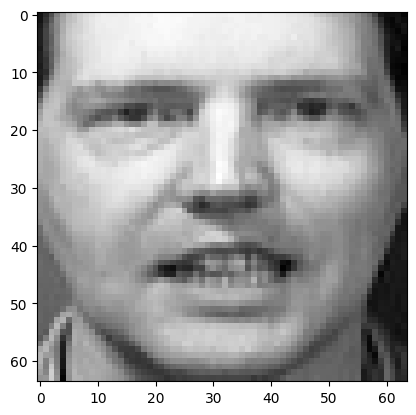

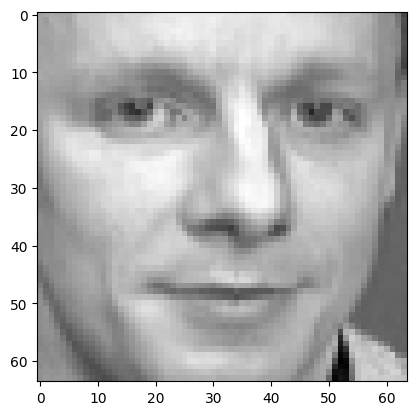

In [35]:
cluster_pixels = train_X[np.argwhere(y_pred == 2)]


for image in cluster_pixels[0:5]:
    plt.imshow(image.reshape(64, 64), cmap='gray')
    # # plt.title(f"Person ID: {data.loc[0,["label"]]}")
    plt.show()    


Observations:
* Interesting, so the clusters are not exactly similar, but I do see some similarity in the images. 
* Lets calculate inertia and silhouette_score and optimize the number of clusters

In [36]:
from sklearn.metrics import silhouette_score
print(kmeans.inertia_)
print(silhouette_score(train_X,kmeans.labels_))

17361.96484375
0.097405605


Observations:
* So silhouette score is close to 0, which means the instances are not assigned to correct cluster in most cases, and instances are in border of clusters. 
* Lets run different clustering models on different number of clusters and see if the numbers improve. 

In [42]:
num_of_clusters = [2,4,6,8,10,12,14,15]
cluster_performance = {
    "cluster_count" : [],
    "silhouette_score" : [],
    "inertia":[]
}

for cluster_count in num_of_clusters:
    kmeans = KMeans(n_clusters=cluster_count, n_init=10, random_state=42)
    start = time.time()
    y_pred = kmeans.fit_predict(train_X)
    end = time.time()
    print(f"Training took {end - start}s")
    sil_score = silhouette_score(train_X,kmeans.labels_)
    inertia_score = kmeans.inertia_
    cluster_performance["cluster_count"].append(cluster_count)
    cluster_performance["silhouette_score"].append(sil_score)
    cluster_performance["inertia"].append(inertia_score)
    
cluster_performance

Training took 0.09601402282714844s
Training took 0.15104198455810547s
Training took 0.20745086669921875s
Training took 0.2523469924926758s
Training took 0.3079209327697754s
Training took 0.36040186882019043s
Training took 0.3996427059173584s
Training took 0.4525787830352783s


{'cluster_count': [2, 4, 6, 8, 10, 12, 14, 15],
 'silhouette_score': [np.float32(0.15744786),
  np.float32(0.10728703),
  np.float32(0.08897857),
  np.float32(0.089805745),
  np.float32(0.09984829),
  np.float32(0.08694152),
  np.float32(0.08848506),
  np.float32(0.08729986)],
 'inertia': [21148.267578125,
  18004.1796875,
  16733.2109375,
  15892.244140625,
  15133.0595703125,
  14413.7587890625,
  14036.451171875,
  13748.982421875]}

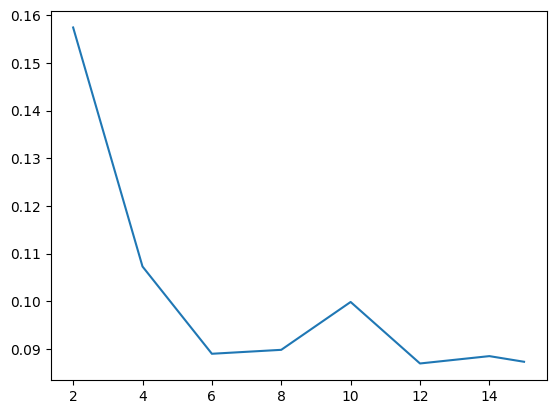

In [46]:
import matplotlib.pyplot as plt
## lets plot to get more info

plt.plot(cluster_performance["cluster_count"], cluster_performance["silhouette_score"])



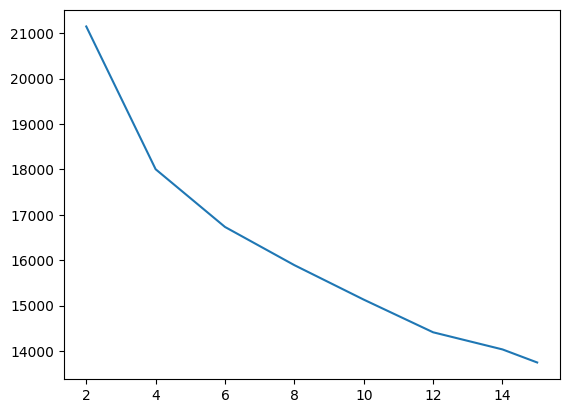

In [47]:
plt.plot(cluster_performance["cluster_count"], cluster_performance["inertia"])